# Self-Organizing Maps (SOMs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset

In [2]:
%cat "./00_data/Credit_Card_Applications.csv"|head

CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
15739548,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0
15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
15687688,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1
15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
15571121,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
15726466,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
15660390,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
15663942,1,27.83,1,1,2,8,3,0,0,0,0,2,176,538,0


In [3]:
%cat "./00_data/Credit_Card_Applications.csv"|head

CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
15739548,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0
15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
15687688,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1
15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
15571121,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
15726466,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
15660390,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
15663942,1,27.83,1,1,2,8,3,0,0,0,0,2,176,538,0


In [4]:
# train data loading 
train_data = pd.read_csv("./00_data/Credit_Card_Applications.csv")
train_data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
train_data.shape

(690, 16)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [7]:
train_data.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

## Data Preprocessing

In [8]:
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

In [9]:
X.shape

(690, 15)

In [10]:
y.shape

(690,)

### Features scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

norm_encoder = MinMaxScaler(feature_range=(0, 1))
X_scaled = norm_encoder.fit_transform(X)

## Training the SOM

In [12]:
#!pip install minisom

In [13]:
from minisom import MiniSom

In [14]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=1000)

##  Visualizing the results

In [15]:
markers = ["o", "s"]
colors = ["r", "g"]

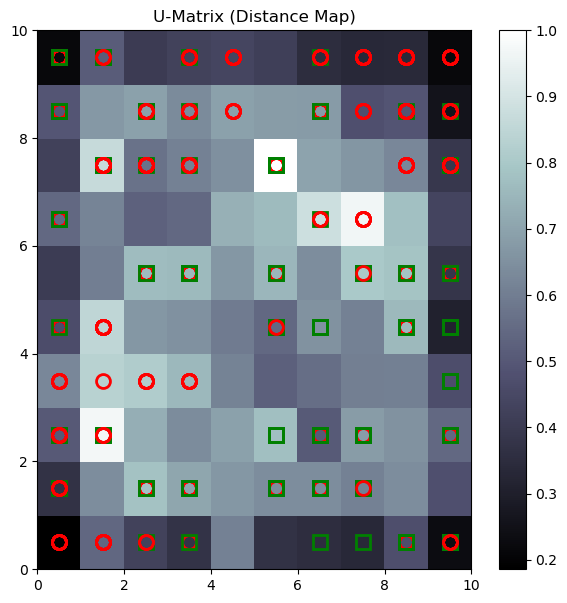

In [16]:
plt.figure(figsize=(7, 7))
u_matrix = som.distance_map()
plt.pcolor(u_matrix.T, cmap='bone')
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, 
             w[1] + 0.5, 
             marker=markers[y[i]], 
             linestyle='None',
             markerfacecolor='none', 
             markeredgecolor=colors[y[i]], 
             markersize=10,
            markeredgewidth=2)
plt.colorbar()
plt.title('U-Matrix (Distance Map)')
plt.show()

## Finding the frouds

In [17]:
mappings = som.win_map(X_scaled)
frauds = np.concatenate([mappings[(1, 3)], mappings[(5, 7)], mappings[(7, 6)]], axis=0)
frauds = norm_encoder.inverse_transform(frauds)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15810716.0,1.0,23.50,3.165,1.0,4.0,4.0,0.415,0.0,1.0,1.0,1.0,2.0,280.0,81.0
1,15766183.0,0.0,24.50,0.500,2.0,11.0,8.0,1.500,1.0,0.0,0.0,0.0,2.0,280.0,825.0
2,15684722.0,0.0,27.67,1.500,2.0,7.0,4.0,2.000,1.0,0.0,0.0,0.0,1.0,368.0,1.0
3,15772329.0,0.0,28.08,15.000,1.0,10.0,9.0,0.000,1.0,0.0,0.0,0.0,2.0,0.0,13213.0
4,15734649.0,0.0,40.83,10.000,2.0,11.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,29.0,838.0
5,15646082.0,0.0,18.83,4.415,1.0,8.0,8.0,3.000,1.0,0.0,0.0,0.0,2.0,240.0,1.0
6,15717629.0,0.0,25.17,2.875,2.0,14.0,8.0,0.875,1.0,0.0,0.0,0.0,2.0,360.0,1.0
7,15604536.0,0.0,20.50,11.835,2.0,8.0,8.0,6.000,1.0,0.0,0.0,0.0,2.0,340.0,1.0
8,15635598.0,0.0,24.58,0.670,2.0,6.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,400.0,1.0
9,15647191.0,0.0,32.33,0.540,2.0,13.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,440.0,11178.0


## Hybrid Model

In [18]:
# features matrix
customers = train_data.iloc[:, 1:].values

In [19]:
# dependent variable
is_fraud = train_data.iloc[:, 0].apply(lambda x: int(x in frauds[:, 0]))

In [20]:
# AAN - classifier

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers)

In [21]:
import tensorflow as tf

2025-06-26 13:29:59.976424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Initializing the ANN
ann = Sequential() 
# Add input layer with 12 neurones(features)
ann.add(Input(shape=(15,)))
# Add first hidden layer with 6 neurones
ann.add(Dense(2, activation="relu")) 
# Output layer (Binary Classification)
ann.add(Dense(1, activation="sigmoid"))

# Compile the ANN
ann.compile(optimizer=Adam(learning_rate=0.05),
            loss="binary_crossentropy",  # loss function
            metrics=["accuracy"])  # metrics

In [23]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = ann.fit(customers_scaled, is_fraud, 
                    epochs=2, batch_size=1, verbose=True)

Epoch 1/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9492 - loss: 0.1901    
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9574 - loss: 0.1556      


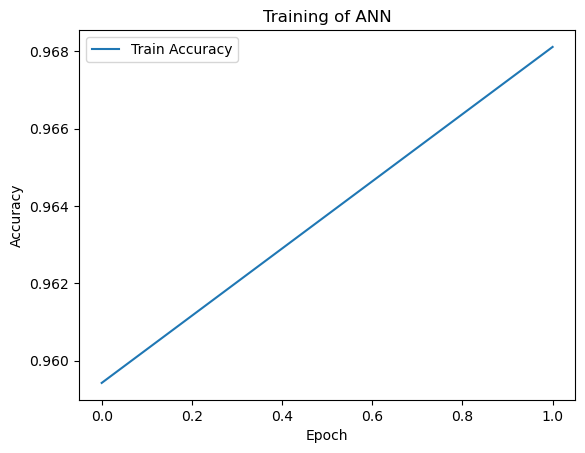

In [25]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
#plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training of ANN")
plt.show()

In [26]:
loss, accuracy = ann.evaluate(customers_scaled, is_fraud, verbose=False)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9681


In [27]:
predictions = ann.predict(customers_scaled, verbose=False)
#predictions = (predictions > 0.5).astype(int)

In [28]:
preds = np.concatenate((train_data.iloc[:, 0:1], predictions), axis=1)

In [29]:
preds[preds[:, 1].argsort()]

array([[1.57901130e+07, 2.82424407e-26],
       [1.57997850e+07, 6.38156452e-14],
       [1.57627160e+07, 1.63253970e-12],
       ...,
       [1.57921070e+07, 7.96106532e-02],
       [1.55938340e+07, 7.96106532e-02],
       [1.57215040e+07, 7.96106532e-02]])